
image 1/1 C:\Users\RSSpe\Pruebas_IA\DeepLearningForCV\elephant.jpg: 448x640 1 elephant, 200.4ms
Speed: 1.9ms preprocess, 200.4ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


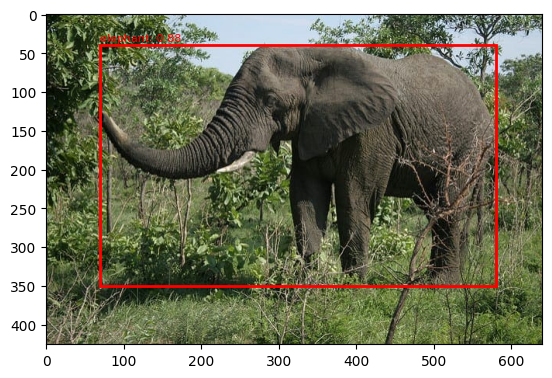

In [3]:
from ultralytics import YOLO
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

# Función para dibujar cajas en la imagen
def draw_image_with_boxes(original_image, detections):
    # Mostrar imagen original
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    ax = plt.gca()

    # Dibujar cada caja
    for detection in detections:
        x1, y1, x2, y2, confidence, class_id = detection
        label = f"{labels[int(class_id)]}: {confidence:.2f}"

        # Calcular ancho y alto
        width, height = x2 - x1, y2 - y1

        # Crear rectángulo
        rect = Rectangle((x1, y1), width, height, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)

        # Etiqueta
        plt.text(x1, y1 - 5, label, color='red', fontsize=8)

    plt.show()

# Cargar el modelo YOLOv8 preentrenado en COCO
model = YOLO("yolov8s.pt")  # Puedes cambiar a 'yolov8n.pt', 'yolov8m.pt', etc.

# Etiquetas de las clases (COCO dataset)
labels = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
    "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
    "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack",
    "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball",
    "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket",
    "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
    "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair",
    "couch", "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse",
    "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
    "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"
]

# Ruta de la imagen
image_path = "elephant.jpg"

# Leer y procesar la imagen
original_image = cv2.imread(image_path)

# Realizar predicción con YOLOv8
results = model.predict(source=image_path, save=False, conf=0.5)

# Extraer detecciones (cajas y clases)
detections = []
for box in results[0].boxes:
    x1, y1, x2, y2 = box.xyxy[0]  # Coordenadas de la caja
    confidence = box.conf[0]      # Confianza
    class_id = box.cls[0]         # ID de la clase
    detections.append([x1.item(), y1.item(), x2.item(), y2.item(), confidence.item(), class_id.item()])

# Dibujar detecciones en la imagen
draw_image_with_boxes(original_image, detections)


image 1/1 C:\Users\RSSpe\Pruebas_IA\DeepLearningForCV\elephant.jpg: 448x640 1 elephant, 286.3ms
Speed: 2.8ms preprocess, 286.3ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


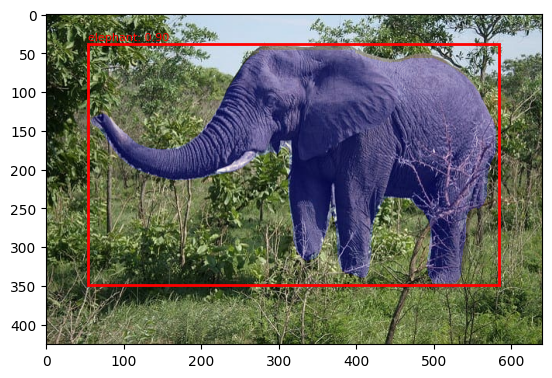

In [40]:
from ultralytics import YOLO
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

# Función para dibujar cajas y máscaras en la imagen
def draw_image_with_boxes_and_masks(original_image, results):
    # Convertir imagen a RGB para Matplotlib
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    ax = plt.gca()

    # Procesar cada detección
    for box, mask in zip(results[0].boxes, results[0].masks.data):
        # Extraer coordenadas de la caja
        x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordenadas de la caja
        confidence = box.conf[0]  # Confianza
        class_id = int(box.cls[0])  # ID de la clase

        # Crear etiqueta
        label = f"{labels[class_id]}: {confidence:.2f}"

        # Calcular ancho y alto de la caja
        width, height = x2 - x1, y2 - y1

        # Dibujar la caja delimitadora
        rect = Rectangle((x1, y1), width, height, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)

        # Dibujar la etiqueta
        plt.text(x1, y1 - 5, label, color='red', fontsize=8)

        # Procesar la máscara
        mask = mask.numpy()  # Convertir a array
        mask = cv2.resize(mask, (original_image.shape[1], original_image.shape[0]))  # Redimensionar a la imagen original

        # Crear una capa de color para la máscara
        color_mask = np.zeros_like(original_image, dtype=np.uint8)
        color_mask[:, :, 0] = mask * 255  # Canal AZUL
        overlay = cv2.addWeighted(original_image, 1, color_mask, 0.5, 0)

        # Superponer la máscara en la imagen original
        plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB), alpha=0.5)

    plt.show()

# Cargar el modelo YOLOv8 de segmentación
model = YOLO("yolov8s-seg.pt")  # Modelo preentrenado para segmentación

# Etiquetas de las clases (COCO dataset)
labels = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
    "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
    "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack",
    "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball",
    "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket",
    "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
    "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair",
    "couch", "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse",
    "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
    "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"
]

# Cargar la imagen
image_path = "elephant.jpg"  # Cambia esto por la ruta a tu imagen
original_image = cv2.imread(image_path)

# Realizar predicciones con YOLOv8
results = model.predict(source=image_path, save=False, conf=0.5)

# Dibujar las detecciones (cajas y máscaras) sobre la imagen
draw_image_with_boxes_and_masks(original_image, results)
